# FTSE 100 stocks data collection and Exploratory Data Analysis

## 1. Introduction

Historical stock market data from Yahoo! Finance will be collected, analysed, transformed and visualised to gain insights into the stock returns for a selection of FTSE 100 companies from 2010-2019, as well as looking at the FTSE 100 Index itself.

## 2. Install/import libraries

In [1]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## 3. Data collection

Download FTSE 100 stock data from Yahoo! Finance using yfinance library and store in a pandas dataframe. The stocks chosen are ULVR.L (Unilever), RSDB.L (Royal Dutch Shell), GSK.L (GlaxoSmithKline), AZN.L (AstraZeneca), HSBA.L (HSBC) and BP.L (BP) representing a selection of different industries - pharmaceuticals, oil and finance.

In [40]:
data = yf.download("AZN.L", start="2010-01-01", end="2020-12-31")
data.head()
data.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2779 entries, 2010-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2779 non-null   float64
 1   High       2779 non-null   float64
 2   Low        2779 non-null   float64
 3   Close      2779 non-null   float64
 4   Adj Close  2779 non-null   float64
 5   Volume     2779 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 152.0 KB


In [41]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2912.0,2946.0,2912.0,2941.0,1652.730347,2091679
2010-01-05,2936.0,2949.5,2901.0,2907.5,1633.904663,2869739
2010-01-06,2909.0,2909.0,2850.5,2875.0,1615.640991,3136541
2010-01-07,2879.0,2925.5,2879.0,2910.5,1635.590698,3748200
2010-01-08,2921.0,2927.5,2889.5,2908.5,1634.466675,2473846


In [2]:
ftse100_stocks = yf.download("AZN.L GSK.L ULVR.L BP.L HSBA.L", start=datetime.datetime(2013, 1, 1), 
                                     end=datetime.datetime(2023, 10, 10), group_by='tickers')
ftse100_stocks.head(10)

[*********************100%%**********************]  5 of 5 completed


AZN.L                                                          \
              Open         High          Low   Close    Adj Close   Volume   
Date                                                                         
2013-01-02  2930.0  2969.297119  2923.000000  2969.0  1974.841431  2394731   
2013-01-03  2969.5  2982.500000  2952.500000  2980.0  1982.158203  1763172   
2013-01-04  2992.5  3005.000000  2975.211914  3000.0  1995.461182  2041101   
2013-01-07  2998.5  3004.989990  2976.000000  2985.0  1985.484009  1185261   
2013-01-08  2986.5  3005.500000  2958.500000  3000.0  1995.461182  2723178   
2013-01-09  3009.0  3009.000000  2983.500000  2986.0  1986.148682  1759019   
2013-01-10  2983.5  3005.000000  2975.899902  2996.5  1993.133301  1784433   
2013-01-11  3019.0  3021.500000  3000.000000  3018.0  2007.433594  1670365   
2013-01-14  3024.5  3035.500000  3018.500000  3030.0  2015.415649  1534721   
2013-01-15  3026.5  3049.000000  3016.500000  3041.5  2023.064941  1988641   

            ULVR.L                               ...      HSBA.L              \
              Open         High     Low   Close  ...         Low       Close   
Date                                             ...                           
2013-01-02  2396.0  2403.000000  2380.0  2392.0  ...  655.599976  665.700012   
2013-01-03  2397.0  2400.000000  2380.0  2399.0  ...  660.799988  662.500000   
2013-01-04  2393.0  2415.241943  2389.0  2415.0  ...  660.000000  667.599976   
2013-01-07  2414.0  2419.000000  2394.0  2398.0  ...  665.900024  666.200012   
2013-01-08  2394.0  2412.000000  2393.0  2411.0  ...  659.200012  659.200012   
2013-01-09  2418.0  2422.000000  2393.0  2393.0  ...  662.200012  669.900024   
2013-01-10  2390.0  2400.000000  2362.0  2387.0  ...  668.500000  673.400024   
2013-01-11  2395.0  2400.000000  2373.0  2384.0  ...  669.098022  677.700012   
2013-01-14  2393.0  2406.197021  2378.0  2378.0  ...  675.799988  675.799988   
2013-01-15  2379.0  2410.000000  2379.0  2405.0  ...  672.200012  679.599976   

                                        GSK.L                            \
             Adj Close    Volume         Open         High          Low   
Date                                                                      
2013-01-02  367.080688  18045934  1349.859253  1380.816406  1346.837158   
2013-01-03  365.316101  10831799  1370.006470  1378.229492  1364.969727   
2013-01-04  368.128418  16019794  1385.116821  1392.168335  1375.043335   
2013-01-07  367.356415  14748401  1388.138916  1390.013550  1381.087402   
2013-01-08  363.496490  19186720  1381.591064  1393.306641  1380.080078   
2013-01-09  369.396606  15561059  1385.116821  1392.168335  1378.568970   
2013-01-10  371.326569  17609736  1392.671997  1402.478760  1382.598389   
2013-01-11  373.697845  20561270  1396.701538  1399.881714  1382.346558   
2013-01-14  372.649933  16426576  1395.190430  1395.190430  1377.561646   
2013-01-15  374.745361  22077278  1382.598389  1383.605835  1366.984375   

                                                
                  Close   Adj Close     Volume  
Date                                            
2013-01-02  1368.495361  705.554443  6231939.0  
2013-01-03  1373.532227  708.151428  6167440.0  
2013-01-04  1391.664673  717.500000  5047555.0  
2013-01-07  1382.094849  712.566223  4943456.0  
2013-01-08  1383.605835  713.345337  4573530.0  
2013-01-09  1392.168335  717.759644  7251993.0  
2013-01-10  1386.627930  714.903320  5944706.0  
2013-01-11  1392.671997  718.019287  4880113.0  
2013-01-14  1382.598389  712.825684  4848072.0  
2013-01-15  1373.028564  707.891785  7225504.0  

[10 rows x 30 columns]

## 4. Exploratory Data Analysis

In [3]:
# Descriptive statistics showing distribution of the data

ftse100_stocks.describe()

AZN.L                                                          \
               Open          High           Low         Close     Adj Close   
count   2721.000000   2721.000000   2721.000000   2721.000000   2721.000000   
mean    6319.361533   6392.346744   6255.081993   6321.192840   5604.349549   
std     2472.009982   2496.779042   2446.540165   2473.352953   2765.264965   
min     2911.500000   2950.500000   2895.000000   2910.000000   1974.841431   
25%     4380.000000   4432.000000   4331.500000   4379.500000   3321.021240   
50%     5300.000000   5385.000000   5265.000000   5310.000000   4532.979004   
75%     8279.000000   8383.000000   8189.000000   8282.000000   7779.659180   
max    12164.000000  12828.452148  12122.066406  12294.000000  12215.059570   

                          ULVR.L                                         ...  \
             Volume         Open         High          Low        Close  ...   
count  2.721000e+03  2721.000000  2721.000000  2721.000000  2721.000000  ...   
mean   2.475272e+06  3674.835459  3705.350219  3644.955216  3675.450659  ...   
std    1.699742e+06   745.688417   752.451288   740.112625   746.072933  ...   
min    0.000000e+00  2310.000000  2333.600098  2291.649902  2306.000000  ...   
25%    1.702376e+06  2871.000000  2896.000000  2847.000000  2872.000000  ...   
50%    2.197334e+06  3946.500000  3977.500000  3911.500000  3946.000000  ...   
75%    2.871212e+06  4237.000000  4272.500000  4209.000000  4238.500000  ...   
max    6.029139e+07  5333.000000  5333.000000  5264.000000  5324.000000  ...   

            HSBA.L                                                GSK.L  \
               Low        Close    Adj Close        Volume         Open   
count  2721.000000  2721.000000  2721.000000  2.721000e+03  2720.000000   
mean    574.817190   579.944190   428.889527  2.846158e+07  1524.847176   
std     112.125172   111.956203    85.762861  1.521223e+07   132.410087   
min     281.500000   283.350006   241.686859  0.000000e+00  1209.836548   
25%     491.850006   495.750000   361.968658  1.918672e+07  1415.916840   
50%     600.900024   605.700012   406.396912  2.460592e+07  1526.146851   
75%     659.099976   662.700012   496.764893  3.310545e+07  1633.556458   
max     790.500000   796.000000   643.919495  1.769065e+08  1859.380859   

                                                                         
              High          Low        Close    Adj Close        Volume  
count  2720.000000  2720.000000  2720.000000  2720.000000  2.720000e+03  
mean   1539.181935  1511.449217  1524.765394  1129.853302  8.878766e+06  
std     135.142213   132.087372   132.709108   233.084120  4.398402e+06  
min    1224.333496  1199.561523  1199.561523   705.554443  0.000000e+00  
25%    1429.028198  1401.225952  1414.330200   909.261841  6.202624e+06  
50%    1537.328613  1512.230286  1524.635864  1128.136414  7.842760e+06  
75%    1648.037231  1622.274078  1631.969910  1324.054565  1.037666e+07  
max    2746.587891  1841.651367  1859.582275  1725.670776  4.539564e+07  

[8 rows x 30 columns]

In [4]:
# Concise summary of the dataframe to check for missing values and data types

ftse100_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2721 entries, 2013-01-02 to 2023-10-09
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (AZN.L, Open)        2721 non-null   float64
 1   (AZN.L, High)        2721 non-null   float64
 2   (AZN.L, Low)         2721 non-null   float64
 3   (AZN.L, Close)       2721 non-null   float64
 4   (AZN.L, Adj Close)   2721 non-null   float64
 5   (AZN.L, Volume)      2721 non-null   int64  
 6   (ULVR.L, Open)       2721 non-null   float64
 7   (ULVR.L, High)       2721 non-null   float64
 8   (ULVR.L, Low)        2721 non-null   float64
 9   (ULVR.L, Close)      2721 non-null   float64
 10  (ULVR.L, Adj Close)  2721 non-null   float64
 11  (ULVR.L, Volume)     2721 non-null   int64  
 12  (BP.L, Open)         2714 non-null   float64
 13  (BP.L, High)         2714 non-null   float64
 14  (BP.L, Low)          2714 non-null   float64
 15  (BP.L, Close)       

In [5]:
# Number of rows indicates number of trading days

ftse100_stocks.shape

(2721, 30)

We will use the Adjusted Close price to take into account all corporate actions, such as stock splits and dividends, to give a more accurate reflection of the true value of the stock and present a coherent picture of returns.

In [6]:
# Dataframe to contain Adjusted Close price for each company's stock

adj_close = pd.DataFrame()

In [7]:
tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'HSBA.L']
for ticker in tickers:
    adj_close[ticker] = ftse100_stocks[ticker]['Adj Close']

adj_close

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-01-02,1974.841431,705.554443,1668.716797,227.195160,367.080688
2013-01-03,1982.158203,708.151428,1673.600098,232.673584,365.316101
2013-01-04,1995.461182,717.500000,1684.762451,238.889420,368.128418
2013-01-07,1985.484009,712.566223,1672.902344,236.387207,367.356415
2013-01-08,1995.461182,713.345337,1681.972168,236.492645,363.496490
...,...,...,...,...,...
2023-10-03,10908.000000,1485.199951,4053.500000,507.941101,634.575928
2023-10-04,10892.000000,1486.800049,4012.500000,491.840240,629.953308
2023-10-05,10902.000000,1483.000000,4030.500000,491.446289,633.887451


Text(0, 0.5, 'Adjusted Close Price (pence)')

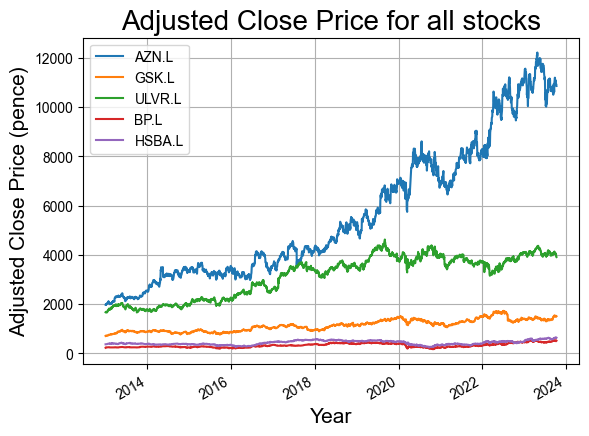

In [8]:
# Plot Adjusted Close price for all stocks

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(12, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15)

This chart shows the absolute price rather than relative change which we are more concerned with when trading. AZN.L and ULVR.L stocks are far more expensive than BP.L and HSBA.L making the latter appear much less volatile than they truly are. 

In [9]:
# lambda function to calculate min and max Adjusted Close price 

adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
min,1974.841431,705.554443,1658.362061,164.800812,241.686859
max,12215.059570,1725.670776,4623.207031,546.427246,643.919495


One solution would be to use two different scales when plotting the data. One scale will be used by the BP.L and HSBA.L stocks, and the other by the more expensive stocks.

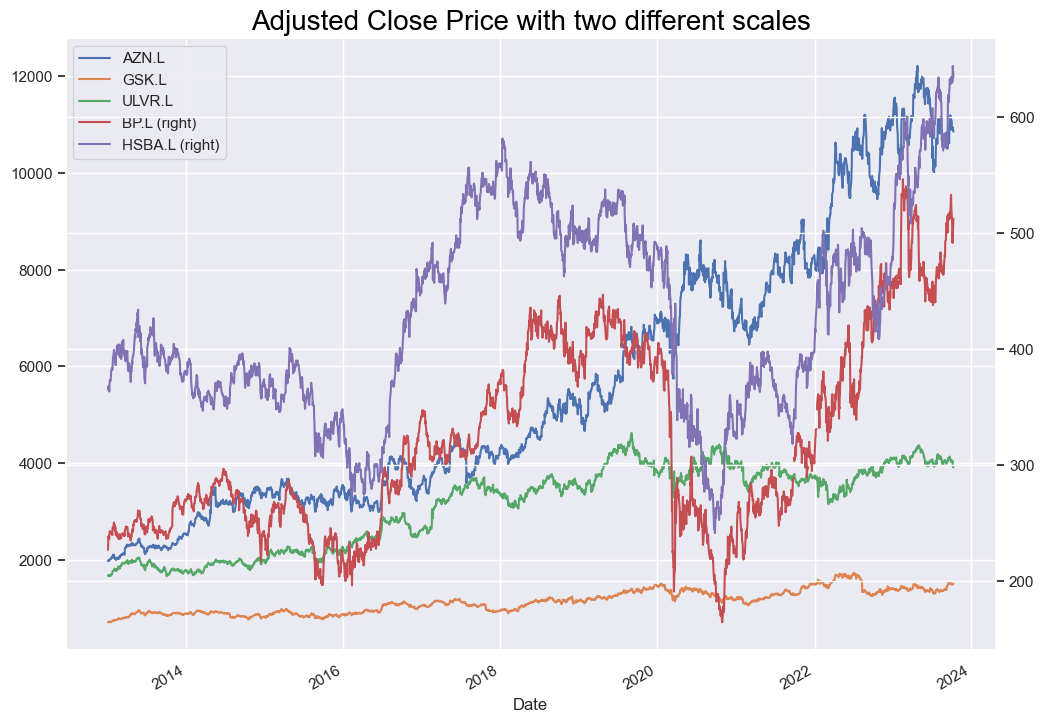

In [10]:
# Plot BP.L and HSBA.L data on a secondary y-axis

adj_close.plot(secondary_y = ["BP.L", "HSBA.L"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

## 5. Data transformation

A better solution would be to plot the stocks' returns, which requires transforming the data into something more useful for our purposes.




### 5.1 Consider stocks' returns since beginning of the time period

One transformation is to plot $return_{t,0}$  = $\frac{price_t}{price_0}$ by applying a lambda function to each column in the adj_close dataframe and return a dataframe with the result.

In [11]:
# Transform data using lambda function to plot stocks' returns

returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2013-01-03,1.003705,1.003681,1.002926,1.024113,0.995193
2013-01-04,1.010441,1.016931,1.009616,1.051472,1.002854
2013-01-07,1.005389,1.009938,1.002508,1.040459,1.000751
2013-01-08,1.010441,1.011042,1.007943,1.040923,0.990236


Plot $return_{t,0}$  = $\frac{price_t}{price_0}$ with transformed data

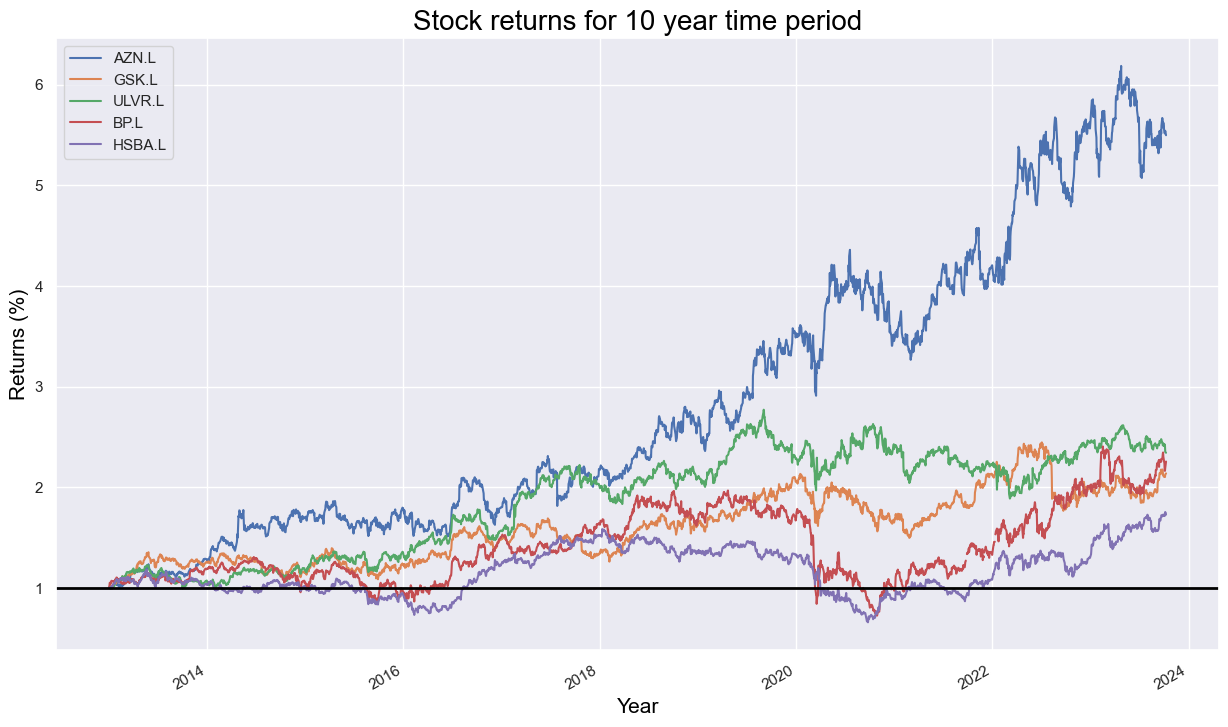

In [12]:
# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

This plot is more useful than the previous one as we can see how profitable each stock was since the beginning of the period and which are most closely correlated. The overall trend of the stocks is much more apparent.

In [13]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

### 5.2 Percentage change

Another transformation is to calculate the daily percentage change directly using the pandas **'pct_change()'** method which computes the percentage change from the previous row by default.

This can be represented with the formula $increase_{t}$  = $\frac{price_t - price_{t-1}}{price_t}$ 





In [14]:
# pandas pct_change() method on the Adj Close column to create a column representing return value

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'HSBA.L']
for ticker in tickers:
    returns[ticker] = ftse100_stocks[ticker]['Adj Close'].pct_change() * 100

returns

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.370499,0.368077,0.292638,2.411330,-0.480708
2013-01-04,0.671136,1.320137,0.666967,2.671483,0.769831
2013-01-07,-0.499993,-0.687634,-0.703963,-1.047435,-0.209710
2013-01-08,0.502506,0.109339,0.542161,0.044604,-1.050730
...,...,...,...,...,...
2023-10-03,-0.383562,0.080859,0.720586,-0.635711,0.844016
2023-10-04,-0.146681,0.107736,-1.011472,-3.169828,-0.728458
2023-10-05,0.091811,-0.255586,0.448598,-0.080097,0.624513


In [15]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-01-03,0.370499,0.368077,0.292638,2.411330,-0.480708
2013-01-04,0.671136,1.320137,0.666967,2.671483,0.769831
2013-01-07,-0.499993,-0.687634,-0.703963,-1.047435,-0.209710
2013-01-08,0.502506,0.109339,0.542161,0.044604,-1.050730
2013-01-09,-0.466684,0.618818,-0.746608,2.160570,1.623156


Text(0, 0.5, 'Returns (%)')

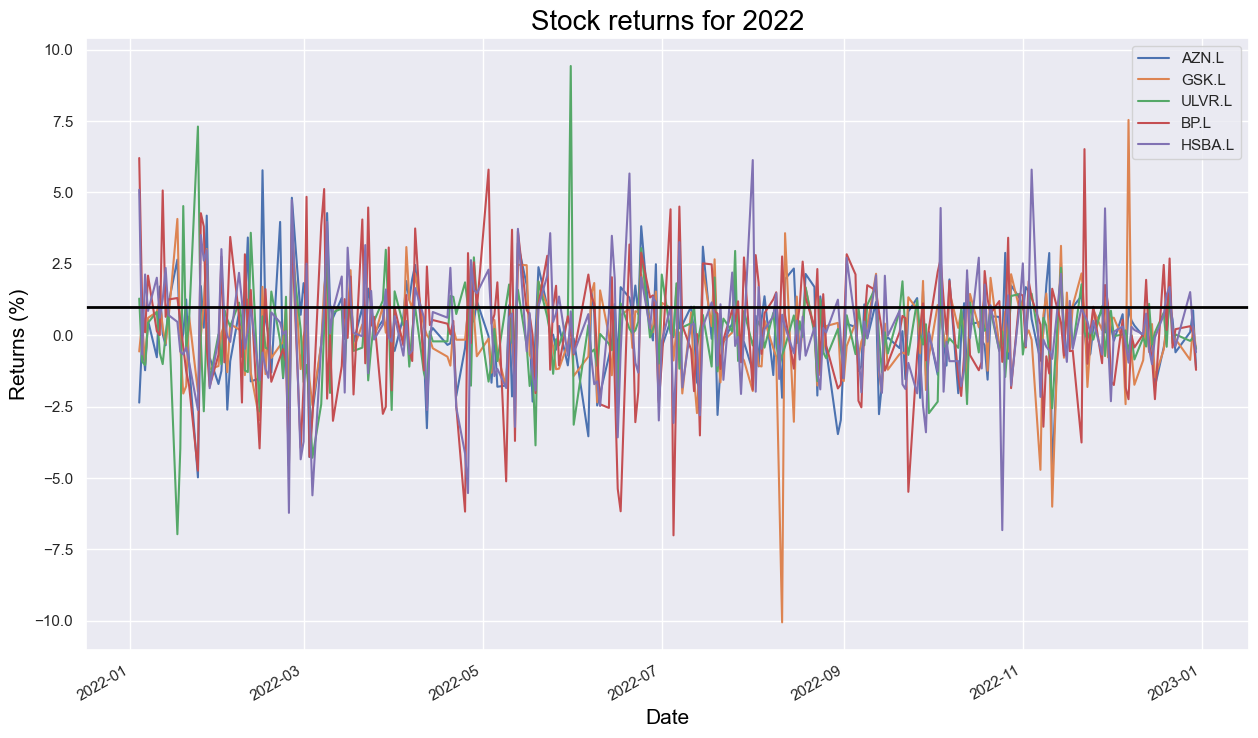

In [16]:
# Plot returns for 2019

returns.loc['2022-01-01':'2022-12-31'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2022', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15)

The above plot for 2019 shows changes between days, which is what more advanced methods consider when modelling stock behaviour.

### 5.3 Log differences

Another way to model the growth of a stock is with log differences. Taking the natural log of the prices will give an approximation to the true daily returns.

This can be represented with the formula $change_{t}$  = $log (price_{t}) - log (price_{t-1})$ 

Using logs, or summarising changes in terms of continuous compounding, has a number of advantages over looking at simple percent changes. For example, if your portfolio goes up by 50% (say from £100 to £150) and then declines by 50% (say from £150 to £75), you’re not back where you started. If you calculate your average percentage return (in this case, 0%), that’s not a particularly useful summary of the fact that you actually ended up 25% below where you started. 

By contrast, if your portfolio goes up in logarithmic terms by 0.5, and then falls in logarithmic terms by 0.5, you are exactly back where you started. The average log return on your portfolio is exactly the same number as the change in log price between the time you bought it and the time you sold it, divided by the number of years that you held it.


In [17]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.003698,0.003674,0.002922,0.023827,-0.004819
2013-01-04,0.006689,0.013115,0.006648,0.026364,0.007669
2013-01-07,-0.005012,-0.006900,-0.007065,-0.010530,-0.002099
2013-01-08,0.005012,0.001093,0.005407,0.000446,-0.010563


In [18]:
# Clean up the data by dropping NaNs

stock_change.dropna(inplace=True)
stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-01-03,0.003698,0.003674,0.002922,0.023827,-0.004819
2013-01-04,0.006689,0.013115,0.006648,0.026364,0.007669
2013-01-07,-0.005012,-0.006900,-0.007065,-0.010530,-0.002099
2013-01-08,0.005012,0.001093,0.005407,0.000446,-0.010563
2013-01-09,-0.004678,0.006169,-0.007494,0.021376,0.016101


Text(0, 0.5, 'Natural log')

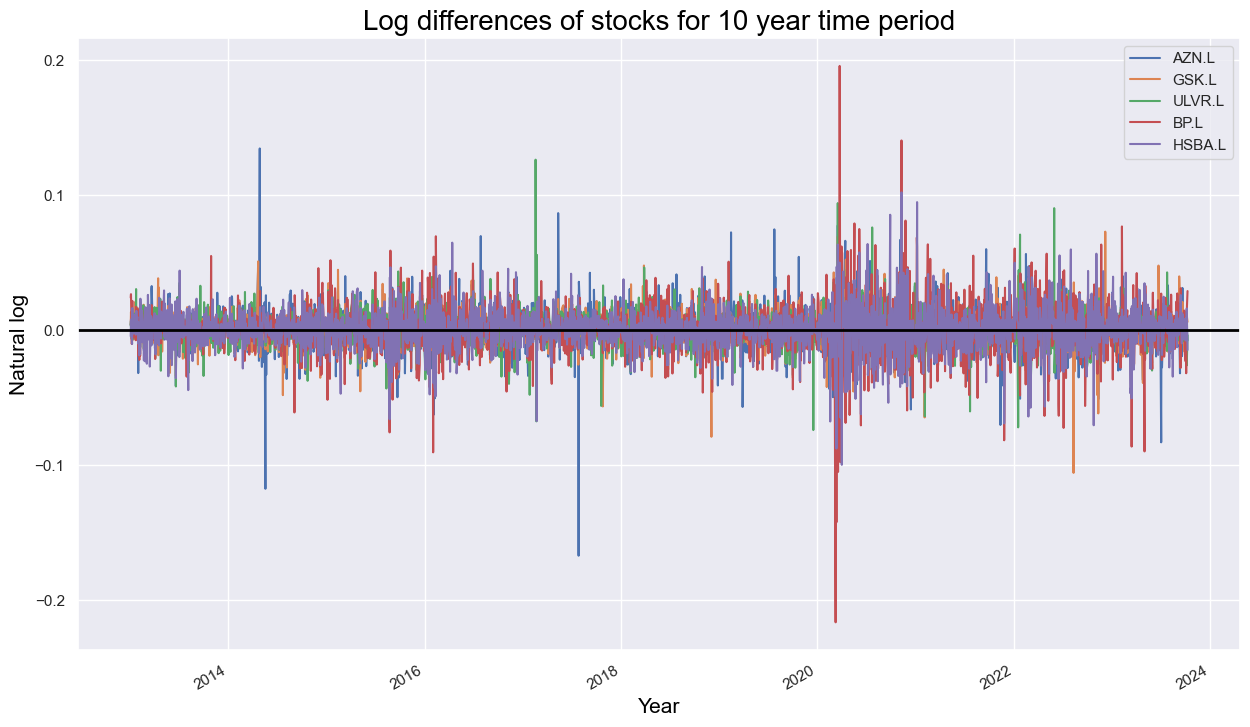

In [19]:
# Plot log differences for 2010-2019

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15)

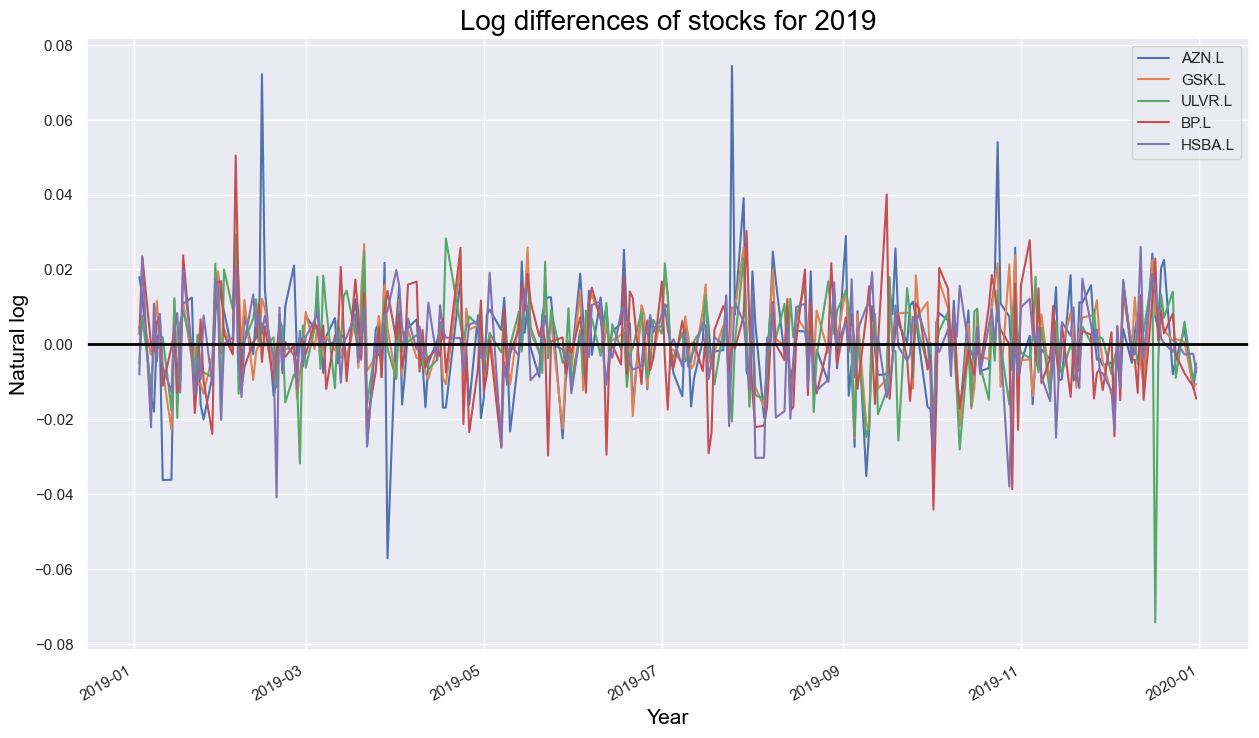

In [20]:
# Plot log differences for 2019

stock_change.loc['2019-01-01':'2019-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2019', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

### 5.4 Annualise returns

We can annualise our returns, thus computing the annual percentage rate (APR). This helps us keep returns on a common time scale.

In [21]:
# annualise returns

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-01-03,93.193274,92.585160,73.637103,600.444453,-121.430594
2013-01-04,168.561281,330.497878,167.517557,664.378368,193.254517
2013-01-07,-126.314365,-173.882395,-178.026080,-265.345841,-52.902484
2013-01-08,126.314365,27.538411,136.255545,11.237711,-266.184882
2013-01-09,-117.879670,155.461523,-188.851093,538.665197,405.751221
...,...,...,...,...,...
2023-10-03,-96.843380,20.368296,180.936653,-160.710478,211.799486
2023-10-04,-36.990832,27.134902,-256.188668,-811.731030,-184.243322
2023-10-05,23.125633,-64.490054,112.793922,-20.192642,156.888002


Text(0, 0.5, 'APR')

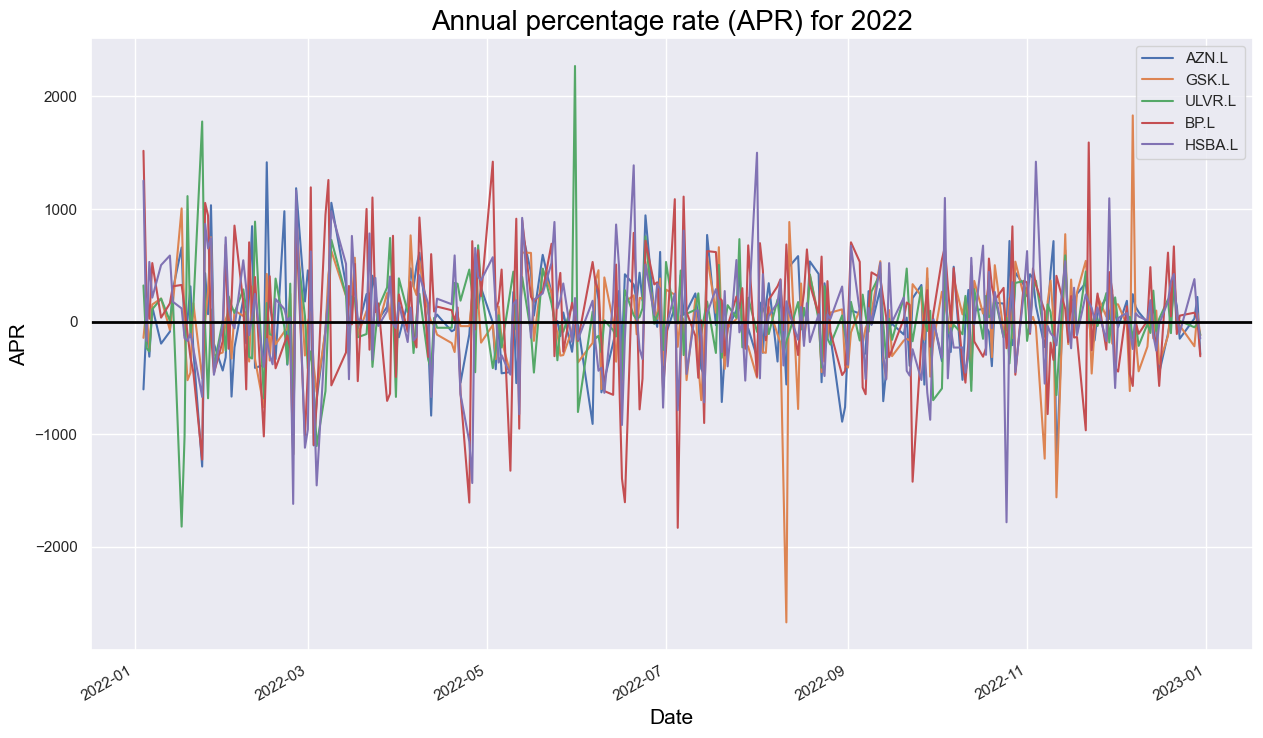

In [22]:
# Plot annualised returns for 2019

stock_change_apr['2022-01-01':'2022-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2022', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15)

## 6. Calculating statistical data for returns

### 6.1 Calculate minimum and maximum returns for 2010-2019

In [23]:
# Date of worst single day returns

returns.idxmin()

AZN.L    2017-07-27
GSK.L    2022-08-11
ULVR.L   2019-12-17
BP.L     2020-03-09
HSBA.L   2020-04-01
dtype: datetime64[ns]

In [24]:
# Date of best single day returns

returns.idxmax()

AZN.L    2014-04-28
GSK.L    2022-12-07
ULVR.L   2017-02-17
BP.L     2020-03-24
HSBA.L   2020-11-09
dtype: datetime64[ns]

There may be some significance in the two pharmaceutical stocks' best day being within a few days of each other in the same month and year. Also, BP's largest drop and biggest gain were in consecutive months in the same year.

### 6.2 Mean

The mean is a statistical indicator that can be used to gauge the performance of a company’s stock price over a particular time period. Here it is the average of the returns, and also determines the standard deviation and variance.


In [25]:
# Compute mean to give a representation of the average expected returns 

returns.mean()

AZN.L     0.073905
GSK.L     0.035635
ULVR.L    0.039048
BP.L      0.047379
HSBA.L    0.031260
dtype: float64

### 6.3 Variance

The variance measures variability from the average or mean. It correlates to the size of the overall range of the data set, being greater when there is a wider range and narrower when there is a narrower range.  

It is calculated by taking the differences between each value in the data set and the mean, squaring the differences to make them positive, and dividing the sum of the squares by the number of values in the data set.

The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean from cancelling out those below, which would result in a variance of zero.

This can be represented by the formula σ<sup>2</sup> = $\frac {\sum_{i = 1}^n (x_i - \overline{x})^2}{n}$




In [26]:
# Compute variance to give a measure of the dispersion of returns around the mean

returns.var()

AZN.L     2.242673
GSK.L     1.537199
ULVR.L    1.556395
BP.L      3.495763
HSBA.L    2.230653
dtype: float64

### 6.4 Standard deviation

Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility. It looks at how far from the mean a group of values is, and is calculated as the square root of variance by figuring out the variation between each data point relative to the mean. Essentially, it is the square root of the average squared deviation from the mean, and the more spread out the values are, the higher the standard deviation.
 


In [27]:
# Compute the standard deviation to describe dispersion, or variability, in the stock returns from the mean 
 
returns.std()

AZN.L     1.497556
GSK.L     1.239838
ULVR.L    1.247556
BP.L      1.869696
HSBA.L    1.493537
dtype: float64

However, in order for standard deviation to be an accurate measure of risk, an assumption has to be made that investment performance data follows a normal distribution and has a skewness of 0.

### 6.5 Skewness

Financial returns are typically positively or negatively skewed and warp the look of the normally distributed bell-shaped curve distorting the accuracy of standard deviation as a measure of risk. Skewness essentially measures the relative size of the two tails of the distribution.

In [28]:
# Compute skewness to measure the asymmetry of the data around its mean

returns.skew()

AZN.L    -0.105440
GSK.L    -0.249817
ULVR.L    0.625359
BP.L      0.191515
HSBA.L    0.088029
dtype: float64

Here the data looks fairly symmetrical as the skewness for all of the stock returns lies between -0.5 and 0.5 with ULVR.L being the most skewed. With a measure of 0.46 it is slightly positively skewed.

### 6.6 Kurtosis

Kurtosis is a measure of the combined sizes of the two tails - not the peakedness or flatness. It measures the tail-heaviness of the distribution, or amount of probability in the tails. 


In [29]:
# Compute kurtosis as a measure of the combined sizes of the two tails.

returns.kurt()

AZN.L     11.139408
GSK.L      5.246341
ULVR.L    10.655349
BP.L      15.349302
HSBA.L     5.178376
dtype: float64

A normal distribution has a kurtosis of 3, however the pandas kurtosis function makes it a uniform zero and in this case the measure is called excess kurtosis.

It appears that AZN.L has significant excess kurtosis followed by ULVR.L.


## 7. Data visualisation of returns

### 7.1 Pairplot 

Plot pairwise relationships of the stocks with the pairplot() function which uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.

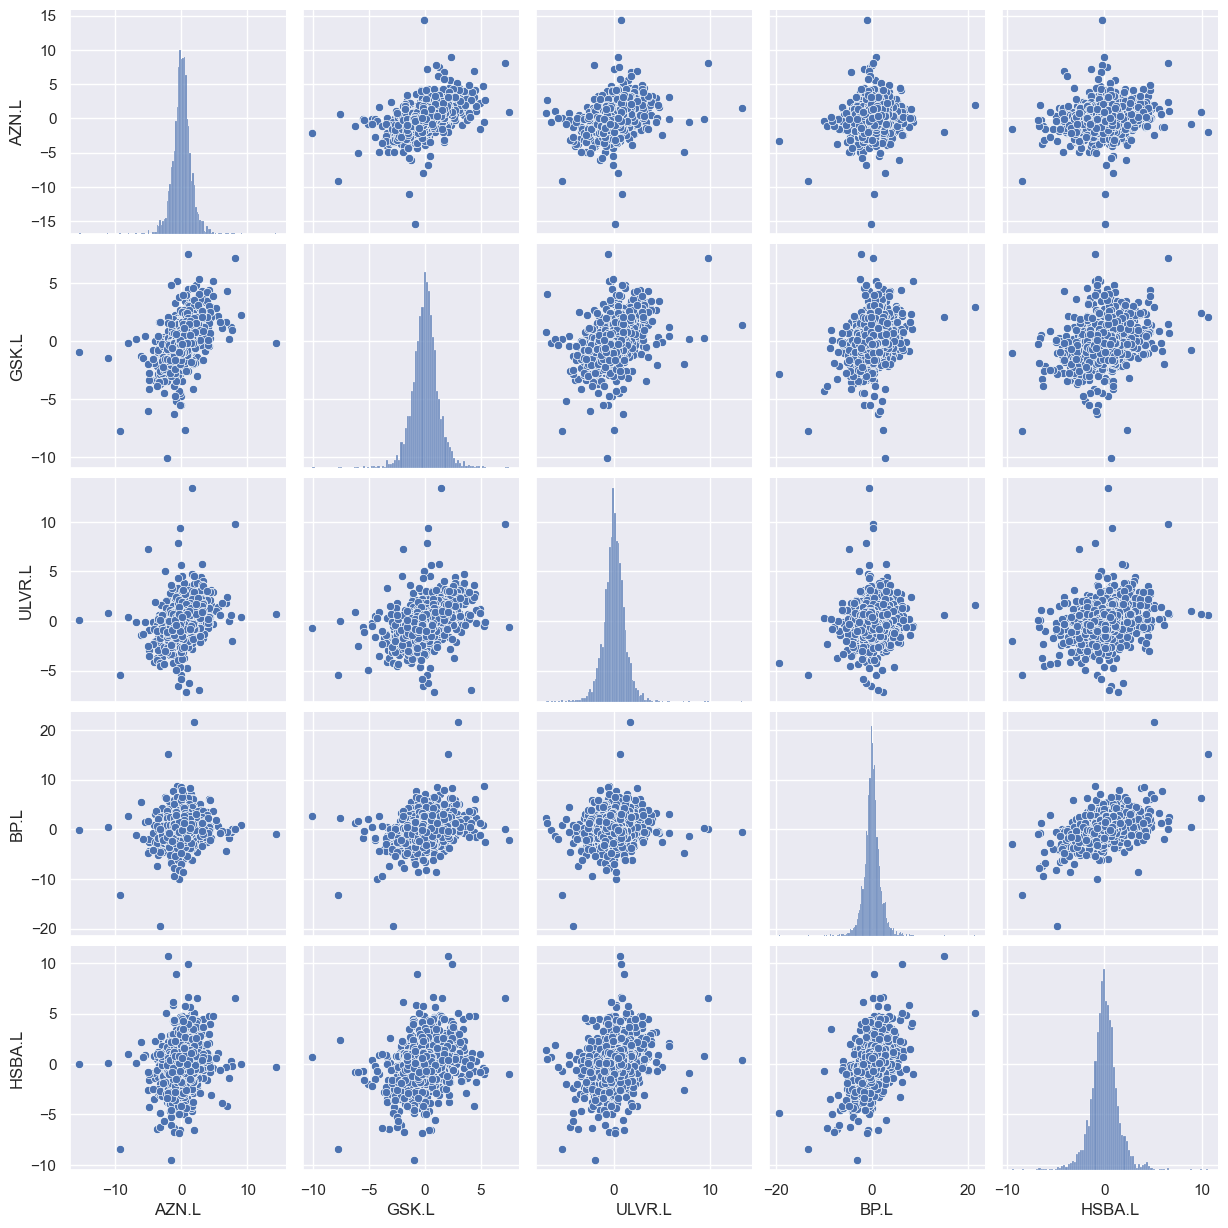

In [30]:
# Pairplot of returns dataframe 

sns.pairplot(returns);

### 7.2 Box plots

Box and whisker plots are a standardised way of displaying the distribution of data based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum), with a line going through the box at the median. 



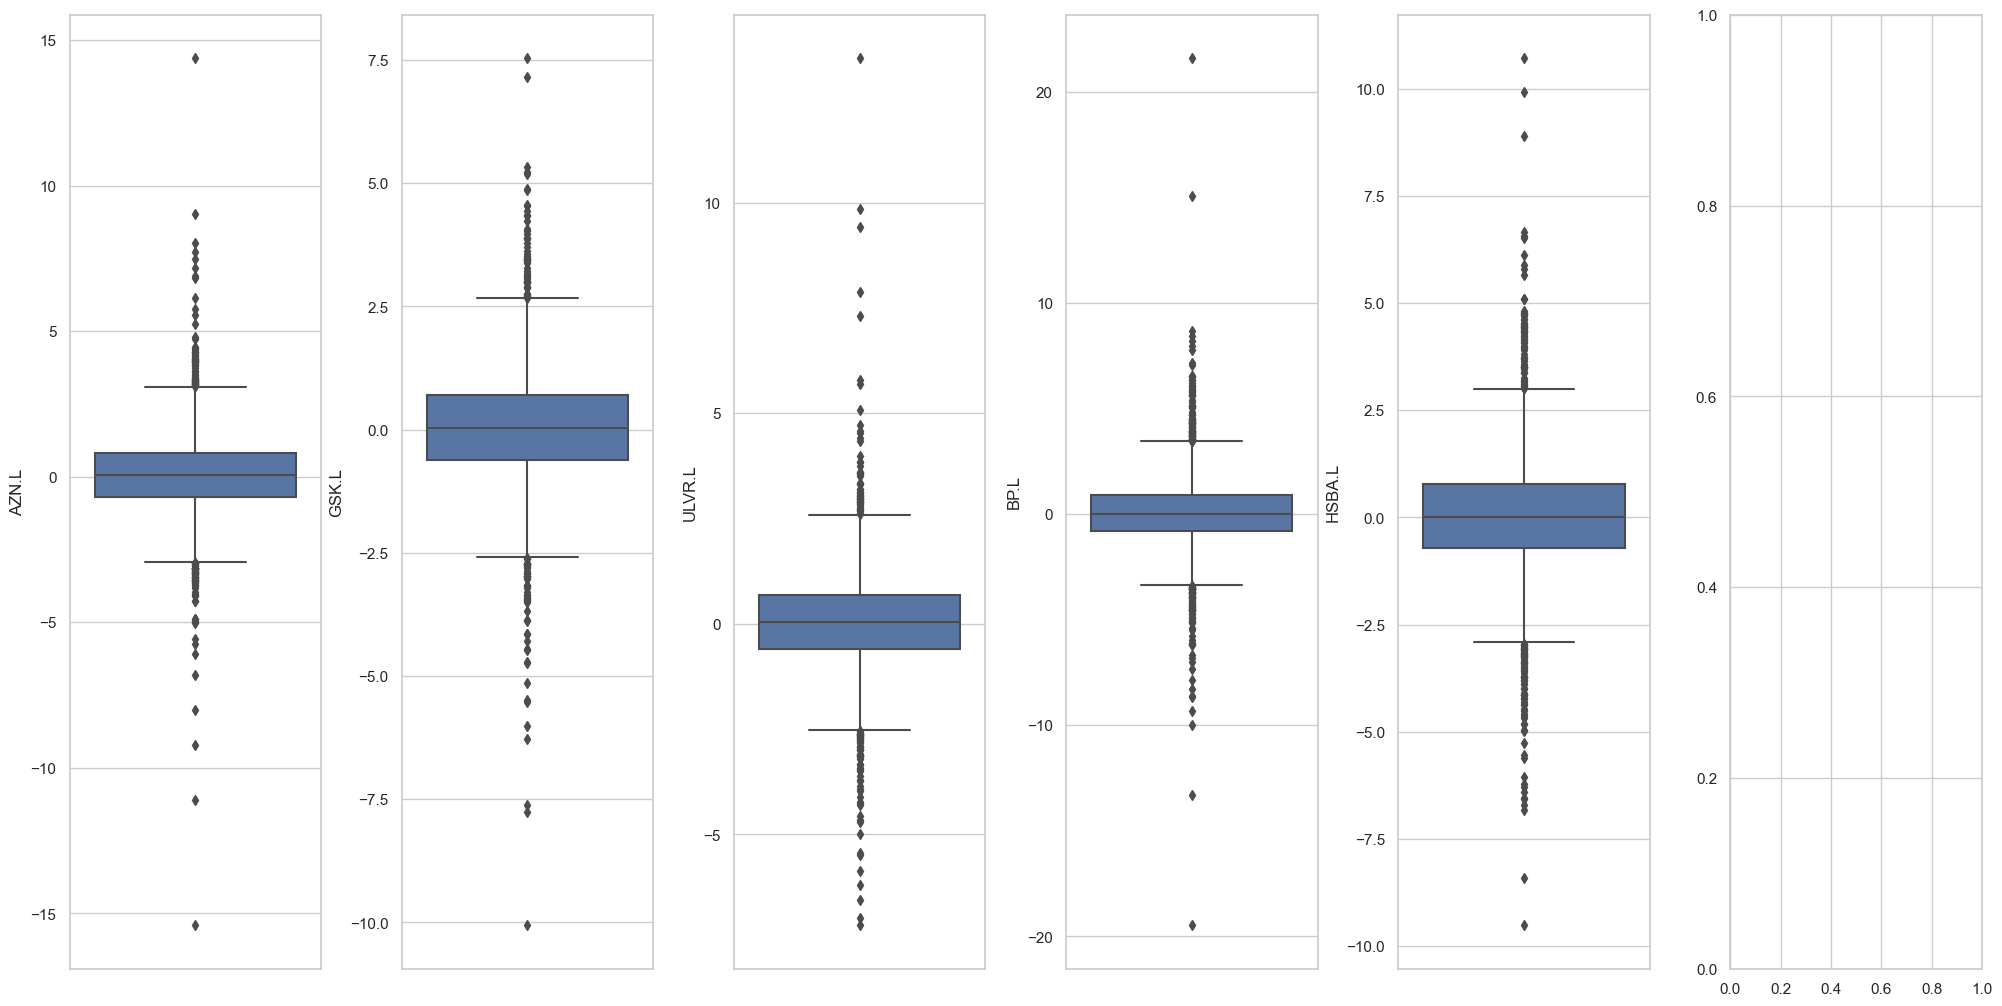

In [31]:
# Boxplots showing distribution of the returns data over the time period 

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

By comparing the interquartile ranges (box lengths), we can compare dispersion. If two boxes do not overlap with one another then there is a difference between the two groups. We can see that AZN.L and ULVR. do not overlap with the other stocks.

If we compare the respective medians and the median line of one box lies outside of another entirely, then there is likely to be a difference between the two groups. Again we can see that AZN.L and ULVR. are different.

Whiskers show how big a range there is between maximum and minimum values, with larger ranges indicating wider distribution, that is, more scattered data.

We can look for signs of skewness suggesting that data may not be normally distributed. Skewed data show a lopsided box plot, where the median cuts the box into two unequal pieces. If the longer part of the box is above the median, the data is said to be positively skewed. If the longer part is or below the median, the data is negatively skewed.

Any values in the data set that are more extreme than the adjacent values are plotted as separate points on the box plot. This identifies them as potential outliers.


### 7.3 Distribution plots

Distribution plots depict the variation in the data distribution. Here the distribution of returns is shown by a histogram and a line in combination with it which is the kernel density estimate.

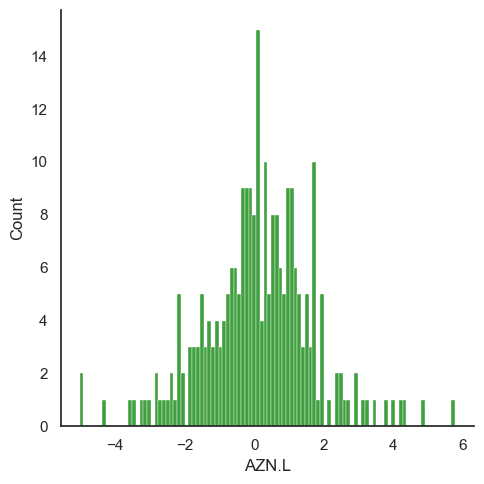

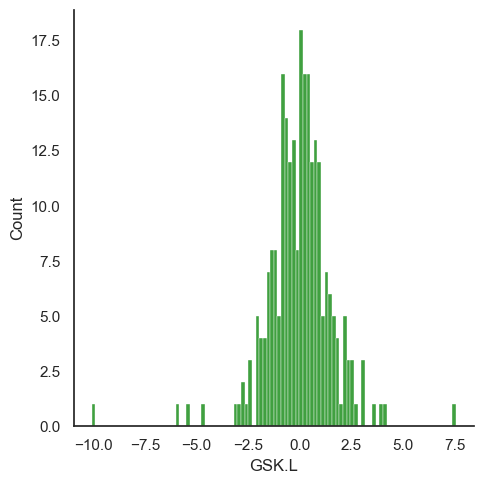

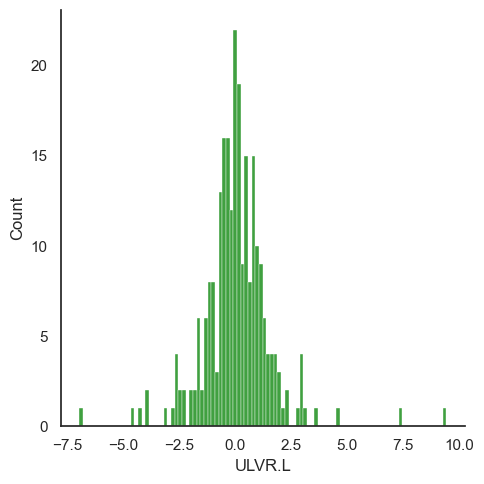

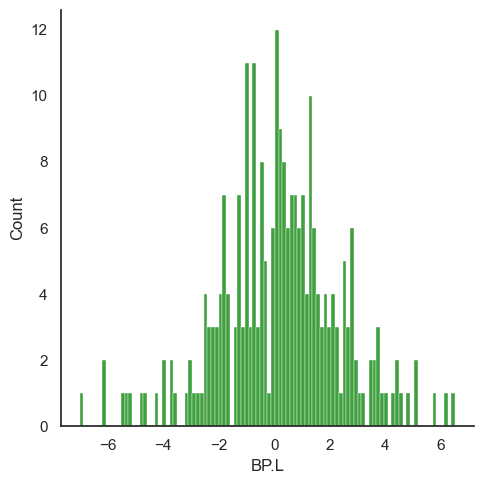

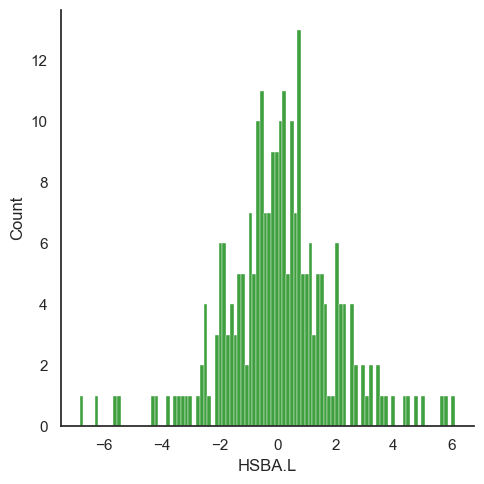

In [32]:
# Distribution plots showing the data for returns for 2019 

sns.set_style("white")

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'HSBA.L']
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
# axs = axs.flatten()

for ticker in tickers:
    sns.displot(returns.loc['2022-01-01':'2022-12-31'][ticker], color='green', bins=100)
    index += 1

### 7.4 Covariance

Covariance indicates the **direction** of the linear relationship between variables. It is a measure of the relationship between two stocks' returns and can help determine if stocks' returns tend to move with or against each other. 

Investors might even be able to select stocks that complement each other in terms of price movement. This can help reduce the overall risk and increase the overall potential return of a portfolio.

In [33]:
# Covariance matrix to show direction of relationship between stocks' returns

returns.cov() 

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
AZN.L,2.242673,1.024390,0.676684,0.552441,0.531550
GSK.L,1.024390,1.537199,0.683544,0.764580,0.621575
ULVR.L,0.676684,0.683544,1.556395,0.491144,0.547600
BP.L,0.552441,0.764580,0.491144,3.495763,1.388882
HSBA.L,0.531550,0.621575,0.547600,1.388882,2.230653


### 7.5 Correlation

Correlation measures both the **strength and direction** of the linear relationship between two variables, or the degree to which two variables move in relation to each other, and is a function of the covariance.

In [34]:
# Correlation matrix to show strength and direction of relationship between stocks' returns

returns.corr()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
AZN.L,1.000000,0.551718,0.362195,0.197302,0.237654
GSK.L,0.551718,1.000000,0.441918,0.329828,0.335670
ULVR.L,0.362195,0.441918,1.000000,0.210561,0.293892
BP.L,0.197302,0.329828,0.210561,1.000000,0.497369
HSBA.L,0.237654,0.335670,0.293892,0.497369,1.000000


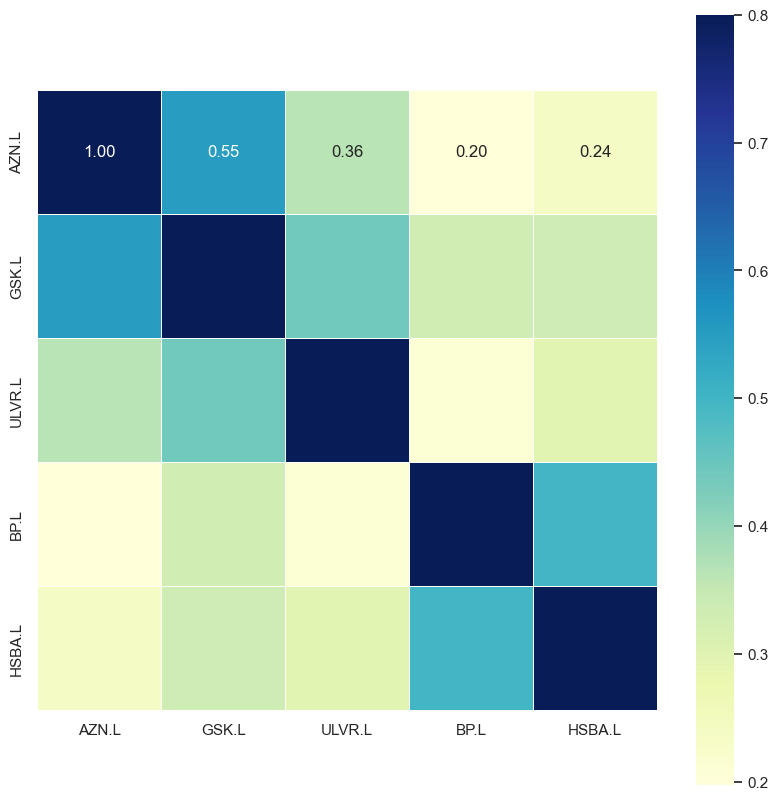

In [35]:
# The heatmap clearly shows the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

The strongest correlation is between RDSB and BP (oil stocks) followed by GSK and AZN (pharmaceutical stocks).

## 8. FTSE 100 Index data

Finally, we will visualise data from the launch of the FTSE 100 Index in January 1984 to the end of 2020 as being representative of the UK stock market.  


In [36]:
# Download FTSE 100 historical stock data from Yahoo! Finance for 1984-2020

ftse100_idx_to_2023 = yf.download("^FTSE", start=datetime.datetime(1984, 1, 1), 
                                     end=datetime.datetime(2023, 1, 1))
ftse100_idx_to_2023

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-01-03,997.500000,1001.400024,997.500000,997.500000,997.500000,0
1984-01-04,997.500000,999.500000,993.299988,998.599976,998.599976,0
1984-01-05,1007.099976,1015.799988,1007.099976,1015.799988,1015.799988,0
1984-01-06,1019.000000,1029.300049,1019.000000,1029.000000,1029.000000,0
1984-01-09,1030.599976,1035.400024,1030.599976,1034.599976,1034.599976,0
...,...,...,...,...,...,...
2022-12-22,7497.299805,7540.299805,7463.500000,7469.299805,7469.299805,402305900
2022-12-23,7469.299805,7496.399902,7462.799805,7473.000000,7473.000000,222853700
2022-12-28,7473.000000,7547.000000,7473.000000,7497.200195,7497.200195,416900400


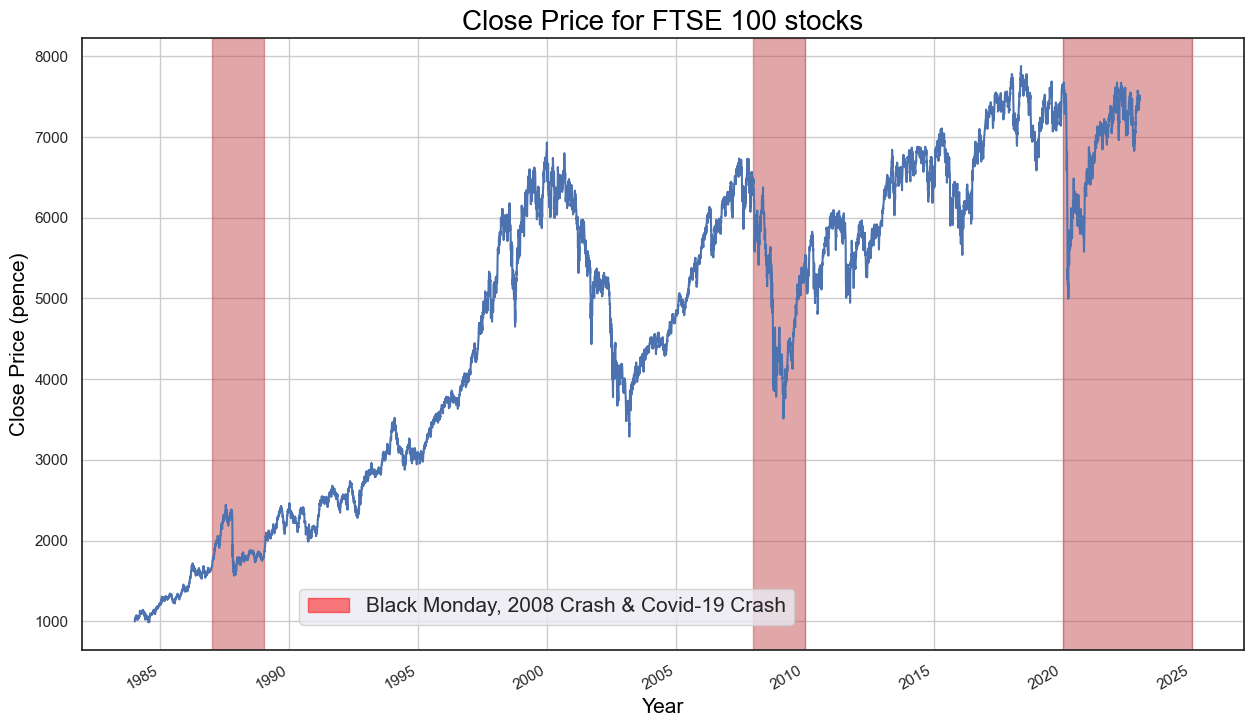

In [37]:
def ftse100_to_2023_plot():
    ftse100_idx_to_2023['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2025',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for FTSE 100 stocks', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price (pence)', color = 'black', fontsize = 15)
    plt.show()

ftse100_to_2023_plot()

The plot clearly shows the major market events of Black Monday in 1987, the 2008 Global Financial Crisis, and the Coronavirus Crash in 2020 and appears to confirm the overall upward trend of stocks from 2010-2019 evident in the selection of stocks analysed.